<a href="https://colab.research.google.com/github/BINDHUPALLE/project1/blob/main/magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# imp sklearn conc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from sklearn.datasets import load_iris
#You can load your own dataset or use built-in ones:
data = load_iris()
X = data.data      # Features
y = data.target    # Labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Preprocessing Tool
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Choose and Train a Model
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
#Make Predictions
y_pred = model.predict(X_test)
# Evaluate the Model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
col=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','Class']
df=pd.read_csv('magic04.data',names=col)
df.head()


In [ ]:
df.columns

In [ ]:
df['Class']=(df['Class']=='g').astype(int)

In [ ]:
df.head()
df['Class'].unique()

In [ ]:
# plotting graphs for clarity
import matplotlib.pyplot as plt
for i in col:
  plt.hist(df[df['Class']==1][[i]],color='g',label='gamma',alpha=0.5,density=True)
  plt.hist(df[df['Class']==0][i],color='r',label='hadron',alpha=0.7,density=True)
  plt.title(i)
  plt.xlabel(i)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [ ]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(df,oversample=False):
  x=df[df.columns[:-1]].values
  y=df[df.columns[-1]].values
  scaler=StandardScaler()
  x=scaler.fit_transform(x)
  #over sampling coz no of 1 (gammas) are more than hadron . else model shows bias towaards gamma.

  if oversample:
    ros=RandomOverSampler()
    x,y=ros.fit_resample(x,y)
  data=np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y

In [ ]:
train,x_train,y_train=scale_dataset(train,oversample=True)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

In [ ]:
sum(y_train==0)

model1: knn= k nearest neighbours
. here scaling  andover sampling is so imp


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=15)
knn_model.fit(x_train,y_train)

In [ ]:
y_pred=knn_model.predict(x_valid)
print(classification_report(y_valid,y_pred))
#precision for 1 is like out of all the 1 s that knn model predicited how many are actually ones
# recall= out of all the 1 s . ow many we actually get right
#knn depends on k a lot

In [ ]:
#naive bayes
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_valid)
print(classification_report(y_valid,y_pred))

In [ ]:
#logistic regression
#classifying using regression
# fitting data to sigmoid fun
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_valid)
print(classification_report(y_valid,y_pred))

In [ ]:
# support vector machine
# find line (2D) or hyper plane(3d) that best divides the classes

# best fit: margins are lines parallel to best lit passing through the closest datapoint. best fit should maximize distance between itself and marigin. datapoints on margin is called supporting vector
# but svm is robust to outliers
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_valid)
print(classification_report(y_valid,y_pred))
# for non linear boundaries  we use kernall tricks to find hyper plane

In [ ]:
# all these above 4 models have hyper parameters that can changr accuracy


In [ ]:
#NEURAL NETWORK
def plot_loss(history):
  afig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
  ax1.plot(history.history['loss'],label='loss')
  ax1.plot(history.history['val_loss'],label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Error')
  ax1.legend()
  ax1.grid(True) # for easy reading

  ax2.plot(history.history['accuracy'],label='accuracy')
  ax2.plot(history.history['val_accuracy'],label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Error')
  ax2.legend()
  ax2.grid(True) # for easy reading
  plt.show()


In [ ]:
import tensorflow as tf#open source lib used to devolop and train ml models
def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs,x_valid=x_valid,y_valid=y_valid):
 nn_model=tf.keras.models.Sequential([
  tf.keras.layers.Dense(num_nodes,input_shape=(10,),activation='relu'),
  tf.keras.layers.Dropout(dropout_prob), #randomly choose certain nodes and dont train them
  tf.keras.layers.Dense(num_nodes,activation='relu'),
  tf.keras.layers.Dropout(dropout_prob),
  tf.keras.layers.Dense(1,activation='sigmoid')
  # here we use sigmoid because  to classify we just need 0/1. output of this fun is[0,1]
    ])
# here 10 is no of nodes/neurons in each  hidden layer
# we have 3 hidden layers here
# input_shape=(10,)Means each input sample is a vector of 10 numbers (e.g., features like age, salary, etc.).
 nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
 history=nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_valid,y_valid),verbose=0)
 return nn_model,history
 #history: This is a special object containing logs of:
 #history.history['loss']             training loss per epoch
#history.history['val_loss']         validation loss per epoch
#history.history['accuracy']        training accuracy per epoch
#history.history['val_accuracy']     validation accuracy per epoch



In [ ]:
  plot_loss(history)

  #Loss	If the model is learning and not overfitting
  '''If validation loss increases, while training loss decreases → Overfitting.
   If both losses stay high → Model isn't learning → try a better model or features.

'''
# Accuracy	If the model is getting better at making predictions
  # epoch is the no of time that our model going to see the same data
  #validation_data is some thing that our model test it self on.
  # if you dont have validation data than we can use validation_split=0.smthng. here ur data will be splitted into 82- 20
  # that 20 perc will be used to  test
  #verbose=0 means dont print anything

In [ ]:
# parameters like hidden layer size,learning rate, epochs, batchsize, , dropout, number of layers, activation functions, etc. also play big roles
# this is  called gridsearch
least_val_loss=float('inf')
best_model=None
epochs=100

for num_nodes in [16,32]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005]:
      for batch_size in [32,64]:
        print(f'{num_nodes} nodes,{dropout_prob} dropout prob,{lr} lr,{batch_size} batch size')
        model,history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
        plot_loss(history)
        val_loss=model.evaluate(x_valid,y_valid)[0]
        print(f'validation loss={val_loss}')
        if val_loss<least_val_loss:
          least_val_loss=val_loss
          best_model=model


In [ ]:
y_pred=best_model.predict(x_test)
y_pred=np.round(y_pred).flatten()
print(classification_report(y_test,y_pred))

# implemantaion of linear reg


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import copy # for copying
import seaborn as sns # lib similar to matplotlib
import tensorflow as tf


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dataf=pd.read_excel('/content/bikes.csv.xlsx')
dataf.head()

,Date,Rented Bike Count,Hour,temp,hum,Wind speed (m/s),Visibility (10m),dew,solar,Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
dataf=dataf.drop(['Date','Holiday','Seasons'],axis=1)

In [ ]:
dataf['fun']=(dataf['Functioning Day']=='Yes').astype(int)
dataf=dataf.drop(['Functioning Day'],axis=1)

In [ ]:
dataf.head()

,Rented Bike Count,Hour,temp,hum,Wind speed (m/s),Visibility (10m),dew,solar,Rainfall(mm),Snowfall (cm),fun
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [ ]:
dataf=dataf[dataf['Hour']==12]
dataf.head()

,Rented Bike Count,Hour,temp,hum,Wind speed (m/s),Visibility (10m),dew,solar,Rainfall(mm),Snowfall (cm),fun
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [ ]:
dataf=dataf.drop(['Hour'],axis=1)

In [ ]:
dataf.head()

<ipython-input-49-f71def557176>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


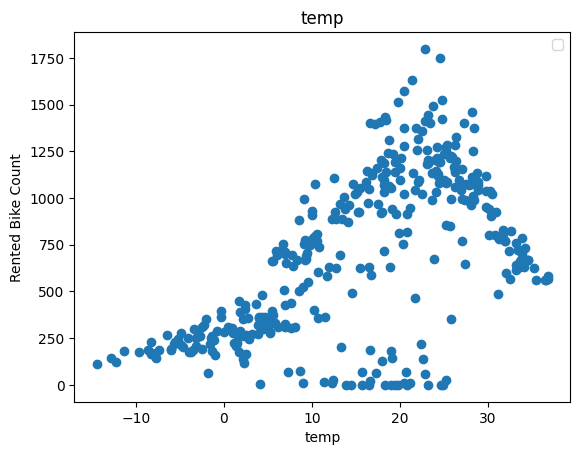

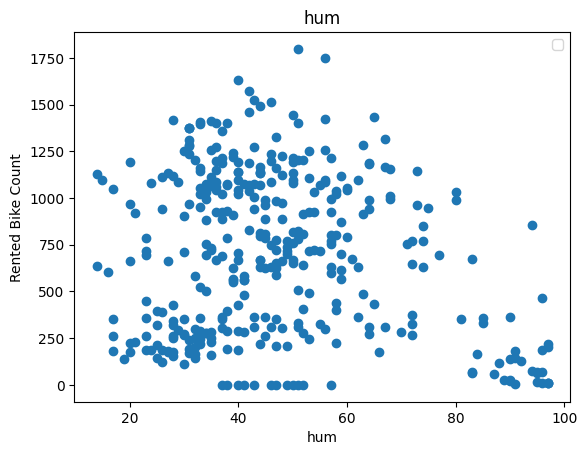

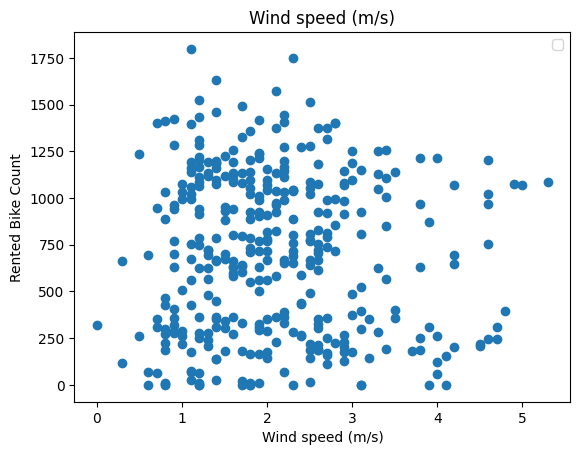

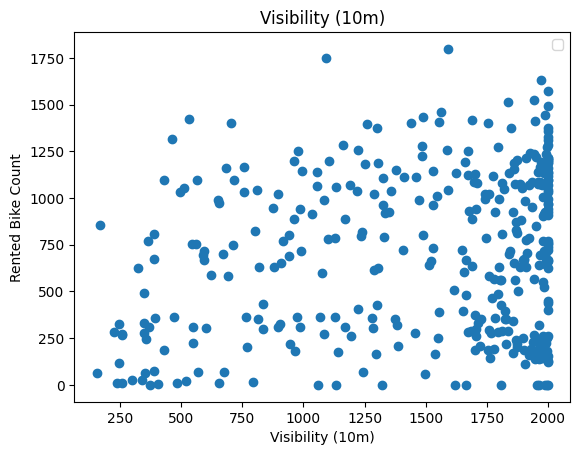

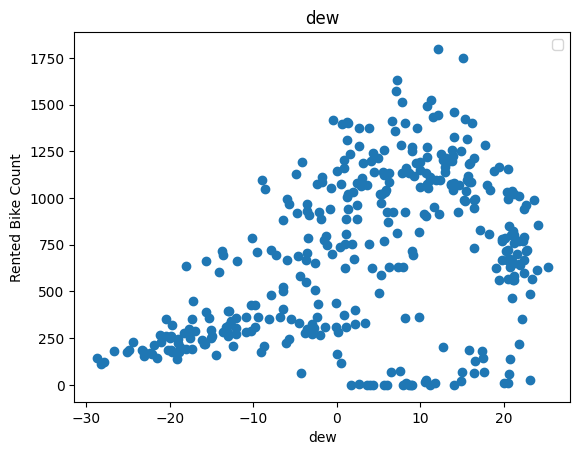

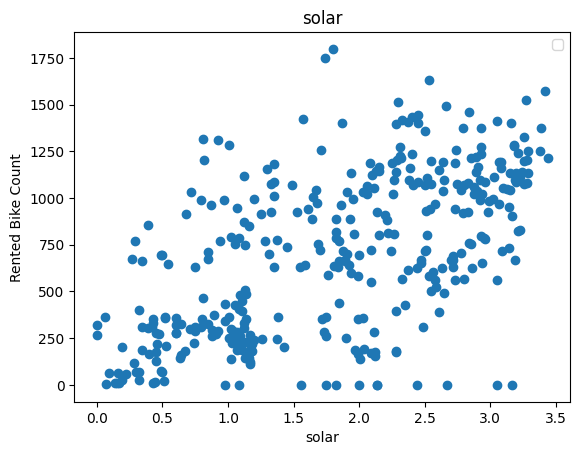

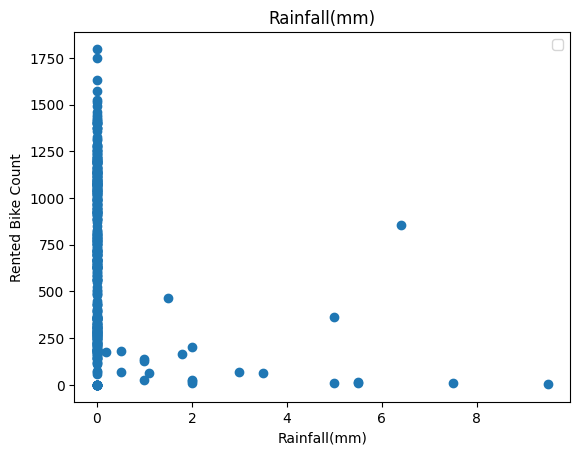

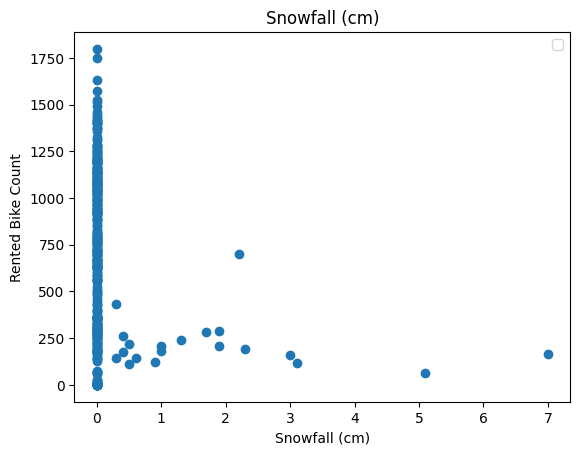

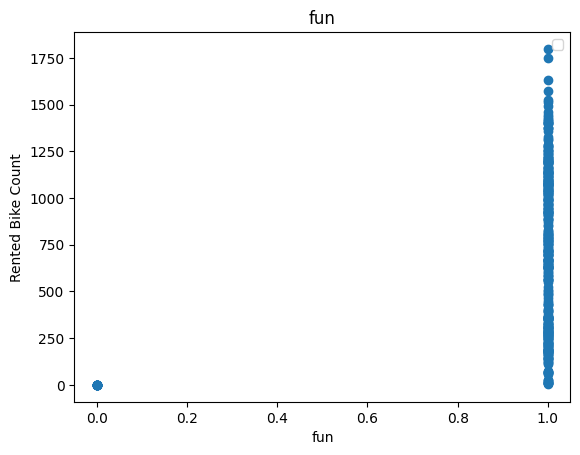

In [ ]:
# to visualize plotting each feature against bike count
for i in dataf.columns[1:]:
  plt.scatter(dataf[i],dataf['Rented Bike Count'])
  plt.xlabel(i)
  plt.ylabel('Rented Bike Count')
  plt.legend()
  plt.title(i)
  plt.show()


In [ ]:
dataf=dataf.drop(['Wind speed (m/s)','Visibility (10m)','fun'],axis=1)

In [ ]:
dataf.head()

,Rented Bike Count,temp,hum,dew,solar,Rainfall(mm),Snowfall (cm)
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [ ]:
train,test,valid=np.split(dataf.sample(frac=1),[int(0.6*len(dataf)),int(0.8*len(dataf))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def dataxy(df,yl,xl=None):
  if xl==None:
    x=dataf[[i for i in dataf.columns if i!=yl]].values
  else:
    if len(xl)==1:
      x=dataf[xl].values.reshape(-1,1)
    else:
       x=dataf[xl].values.reshape(-1,1)
  y=dataf[yl].values.reshape(-1,1)
  data=np.hstack((x,y))
  return data,x,y


In [ ]:
#lin regression: using single variaable
_,X_train,y_train=dataxy(train,'Rented Bike Count','temp')
_,X_test,y_test=dataxy(test,'Rented Bike Count','temp')
_,X_valid,y_valid=dataxy(valid,'Rented Bike Count','temp')

In [ ]:
tem_reg=LinearRegression()
tem_reg.fit(X_train,y_train)
print(tem_reg.coef_)
print(tem_reg.intercept_)
print(tem_reg.score(X_train,y_train))# r*r that is higher the value higher the co relation


[[20.84124918]]
[377.18970415]
0.330867186499053


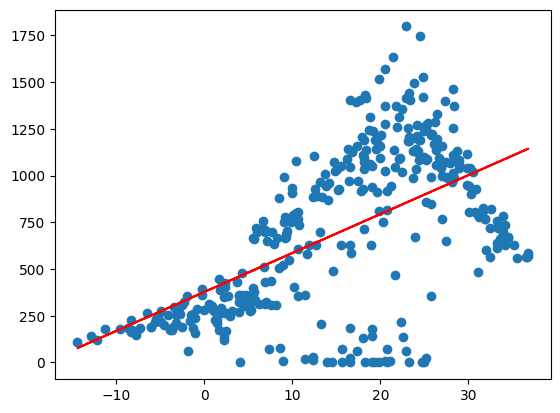

In [ ]:
plt.plot(X_train,tem_reg.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.show()

In [ ]:
#multiple linear reg
_,X_train_all,y_train_all=dataxy(train,'Rented Bike Count')
_,X_test_all,y_test_all=dataxy(test,'Rented Bike Count')
_,X_valid_all,y_valid_all=dataxy(valid,'Rented Bike Count')

In [ ]:
mul_reg=LinearRegression()
mul_reg.fit(X_train_all,y_train_all)
print(mul_reg.coef_)
print(mul_reg.intercept_)
mul_reg.score(X_train_all,y_train_all)

[[ -4.88682875  -8.8904834   22.886612   135.30086653 -32.69337736
  -10.91306981]]
[878.40717473]


0.48323001842092683

In [ ]:
mul_reg.predict(X_train_all)

array([[ 422.15268316],
       [ 461.8463628 ],
       [ 230.36633279],
       [ 396.98152135],
       [ 216.51853951],
       [ 404.02426821],
       [ 361.41486951],
       [ 379.77093057],
       [ 428.83656215],
       [ 100.30196202],
       [ 346.06619596],
       [ 281.4250703 ],
       [ 316.56289912],
       [ 262.43172043],
       [ 249.94381559],
       [ 340.19099453],
       [ 324.99868371],
       [ -28.5613801 ],
       [ 340.10574898],
       [ 225.59197814],
       [ 397.74882921],
       [ 374.50984845],
       [ 341.02767   ],
       [-189.98498397],
       [ 390.88670155],
       [ 374.60196087],
       [ 306.27618453],
       [ 341.56197897],
       [ 323.90108358],
       [ 290.99861789],
       [ 392.51725385],
       [ 397.78152817],
       [ 389.6619317 ],
       [ 343.44077524],
       [ 336.88608042],
       [ 369.27993613],
       [ 400.75425984],
       [ 354.40979155],
       [ 378.36796094],
       [ 331.70458546],
       [ 294.06943376],
       [ 261.843

#regression with NN


In [ ]:
#normaalizing is similar to scaling
# in lin reg Prevents features with large magnitudes from dominating the cost function.
# in nn Helps activation functions (e.g., sigmoid, tanh) work in their sensitive range
temp_normalizer=tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_normalizer.adapt(X_train.reshape(-1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
temp_nn_model=tf.keras.models.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=1)
])
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss='mean_squared_error')
history=temp_nn_model.fit(X_train.reshape(-1),y_train,epochs=1000,validation_data=(X_valid,y_valid),verbose=0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('mse')
  plt.legend()
  plt.grid(True) # for easy reading

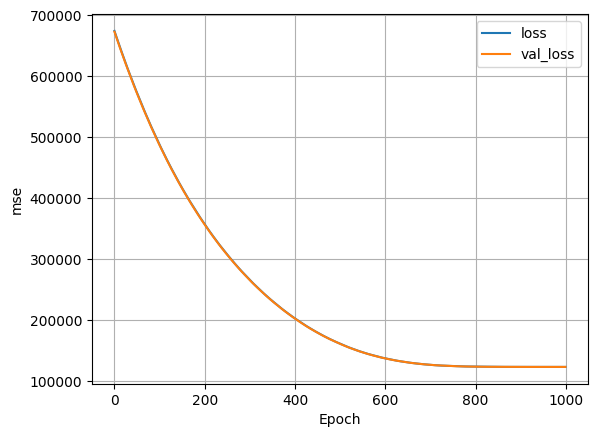

In [ ]:
plot_loss(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


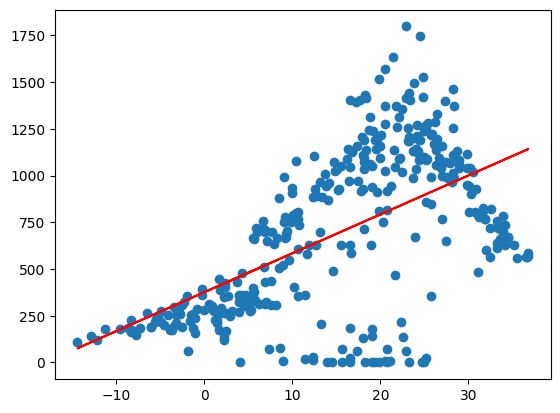

In [ ]:
plt.plot(X_train,temp_nn_model.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.show()

In [ ]:
#both  the plots using temp_nn_model is different from lin reg model due to training process of nn
# these are two diff ways to find best lin reg
# in nn model we are using back propagation  whereas in lin reg model we use best fit
# we use nn model for mul reg


In [ ]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=[1,],axis=None)
temp_normalizer.adapt(X_train.reshape(-1))

In [ ]:
nn_model2=tf.keras.models.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=16,activation='relu'),
  tf.keras.layers.Dense(units=1)
])
nn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
history=nn_model2.fit(X_train.reshape(-1),y_train,epochs=1000,validation_data=(X_valid,y_valid),verbose=0)

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True) # for easy reading

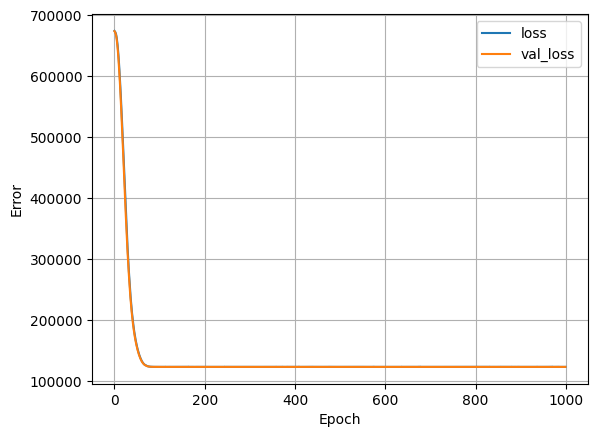

In [ ]:
plot_loss(history)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


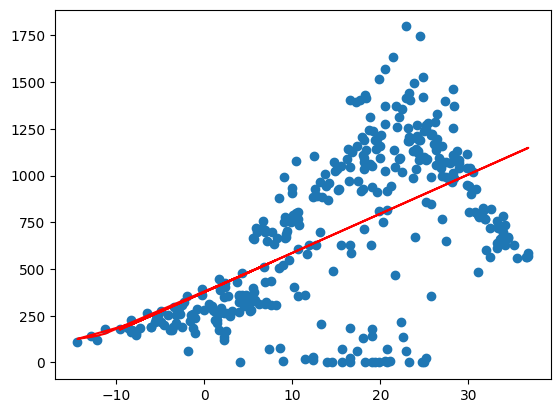

In [ ]:
plt.plot(X_train,nn_model2.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.show()

In [ ]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(6,),axis=None)
temp_normalizer.adapt(X_train_all)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(y_train_all.shape)

(365, 1)


In [ ]:
nn_model2=tf.keras.models.Sequential([
  temp_normalizer,
  tf.keras.layers.Dense(units=16,activation='relu'),
  tf.keras.layers.Dense(units=1)
])
nn_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='mean_squared_error')
history=nn_model2.fit(X_train_all,y_train_all,epochs=1000,validation_data=(X_valid_all,y_valid_all),verbose=0)

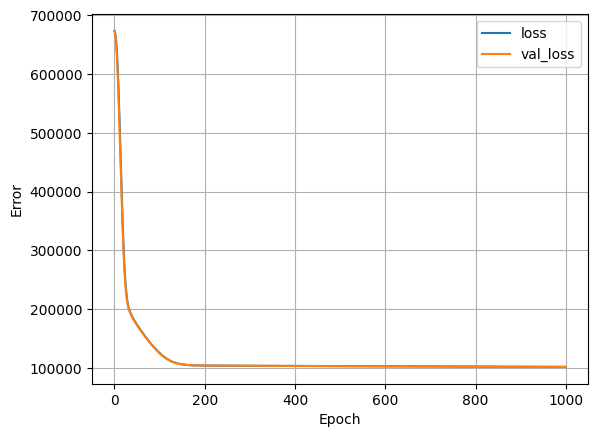

In [ ]:
plot_loss(history)

In [ ]:
y_pred_lr=mul_reg.predict(X_test_all)
y_pred_nn=nn_model2.predict(X_test_all)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
def mse(y_pred,y_test):
  return np.mean((y_pred-y_test)**2)

In [ ]:
print(y_pred_nn.shape)

(365, 1)


In [ ]:
print(mse(y_pred_lr,y_test_all))
print(mse(y_pred_nn,y_test_all))

95616.74056812628
101928.13995149352


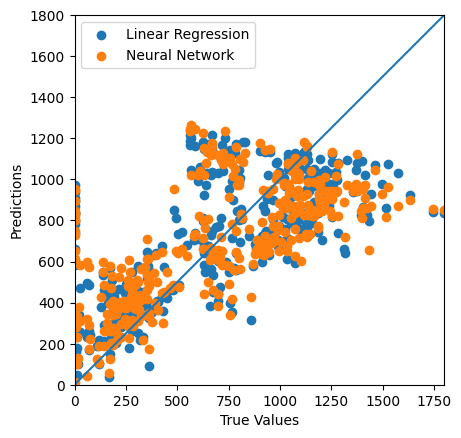

In [ ]:
ax=plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lr,label='Linear Regression')
plt.scatter(y_test_all,y_pred_nn,label='Neural Network')
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims=[0,1800]
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims)
plt.legend()
plt.show()

In [ ]:
import sys
input = lambda: sys.stdin.readline()

DEBUG = True
if DEBUG:
    input = iter("""\
4

3 4
3
1 1 1
6
7 8 1 5 9 2
10
1 7 9 7 1 10 2 10 10 7





""".split('\n')).__next__
t = int(input())
for _ in range(t):
    n = int(input())
    c = list(map(int, input().split()))

    # Pair values with their indices and sort by value descending
    indexed_values = sorted([(val, idx) for idx, val in enumerate(c)], reverse=True)

    used = [False] * n  # Tracks if index is marked/used
    count = 0
    print(indexed_values)
    for val, idx in indexed_values:
        left,right=True,True
        # If both neighbors are unmarked, select this position
        left = idx > 0 and used[idx - 1]
        right = idx < n - 1 and used[idx + 1]

        if not (left or right):
            count += 1
        used[idx] = True

    print(count)












ValueError: invalid literal for int() with base 10: ' '

In [ ]:
a='''1
6
1
5
1
3
1
1
0
1
1
1
1
1
1
1
2
0
0
0
'''
b='''1
6
1
5
1
3
1
1
0
1
1
1
1
1
1
1
2
0
0
0
'''
a==b


True

In [ ]:
import sys
input = lambda: sys.stdin.readline()

DEBUG = True
if DEBUG:
    input = iter("""\
5
1
3
8
15
43



""".split('\n')).__next__
t = int(input())
for _ in range(t):
  x=input().split()
  a,b=int(x[0]),int(x[1])


1
3
17
57
463


In [ ]:
def myPow( x=1.00001, n=123456):
        """
        :type x: float
        :type n: int
        :rtype: float
        """
        if x==0:
            return 0
        if abs(n)>100000:
            ex=abs(n)%100000
            r=1
            moresp=0
            for j in range(100000):
                r*=x
                if j==ex:
                    moresp=r
            for i in range
            return((abs(n)//100000)*r*moresp if n>0 else 1/((abs(n)//100000)*r*moresp ))
        else:
                r=1
                if n<0:
                    for i in range(-n):
                        r*=x
                    return (1/r)
                else:
                        for i in range(n):
                            r*=x
                        return (r)
myPow()

2.718268237192295 1.2643634919886348


3.4368791205382405

In [ ]:
def isValidSudoku( b):
  col=[]
  box=[]
  for i in range(len(b)):
     for j in range(len(b)):
      if b[i][j] in b[i][j+1:]:
        print(b[i][j])
        print(b[i][j+1:])
        return False
      if b[i][j] in b[i+1:][j]:
        print(b[i][j])
        print(b[i+1:][j],i,j)
        return False

isValidSudoku([["5","3",".",".","7",".",".",".","."]
,["6",".",".","1","9","5",".",".","."]
,[".","9","8",".",".",".",".","6","."]
,["8",".",".",".","6",".",".",".","3"]
,["4",".",".","8",".","3",".",".","1"]
,["7",".",".",".","2",".",".",".","6"]
,[".","6",".",".",".",".","2","8","."]
,[".",".",".","4","1","9",".",".","5"]
,[".",".",".",".","8",".",".","7","9"]])

5
['6', '.', '.', '1', '9', '5', '.', '.', '.'] 0 0


False